In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Concrete_Data_Yeh.csv')
data = shuffle(data)

In [3]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
print("Null values check ", data.columns[data.isna().any()].tolist())

Null values check  []


In [5]:
training_features = ['cement','slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate',  'fineaggregate', 'age' ]
label_feature = ['csMPa']
selected_feature_data = data

In [6]:
m = data.shape[0]
n = len(training_features)
percentage_of_training = 85
number_example_in_training = int((percentage_of_training * m)/100)
number_example_in_test = int(m - number_example_in_training)

print('number_example_in_training', number_example_in_training)
print('number_example_in_test', number_example_in_test)

training_data_features = selected_feature_data.head(number_example_in_training)[training_features]
training_data_labels = selected_feature_data.head(number_example_in_training)[label_feature]

test_data_features = selected_feature_data.head(number_example_in_test)[training_features]
test_data_labels = selected_feature_data.head(number_example_in_test)[label_feature]


print('shape of traing data features', training_data_features.shape)
print('shape of traing data labels', training_data_labels.shape)
print('shape of test data features', test_data_features.shape)
print('shape of test data features', test_data_labels.shape)

number_example_in_training 875
number_example_in_test 155
shape of traing data features (875, 8)
shape of traing data labels (875, 1)
shape of test data features (155, 8)
shape of test data features (155, 1)


In [31]:

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1000 == 0: print('epoch ', epoch,)

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 20])

In [32]:
def build_model(learning_rate):

  model = keras.models.Sequential([
          keras.layers.Dense(17, activation=tf.nn.relu,kernel_regularizer= keras.regularizers.l2(0.01),
                       input_shape=(training_data_features.shape[1],)),
    keras.layers.Dense(15, activation=tf.nn.relu,kernel_regularizer= keras.regularizers.l2(0.01),
                       input_shape=(training_data_features.shape[1],)),
    keras.layers.Dense(7, activation=tf.nn.relu, kernel_regularizer= keras.regularizers.l2(0.01)),  
    keras.layers.Dense(3, activation=tf.nn.relu,kernel_regularizer= keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

epoch  0
epoch  1000
epoch  2000
epoch  3000
epoch  4000
epoch  5000
epoch  6000
epoch  7000
epoch  8000
epoch  9000
Learning Rate  0.0003
[20.60843198222499, 3.7315065122419786]
None
Mean Square Error  20.13251863100514
[39.89608] -- [[33.76]]
[41.47958] -- [[35.86]]
[45.438107] -- [[40.2]]
[52.29221] -- [[44.28]]
[36.61325] -- [[37.36]]


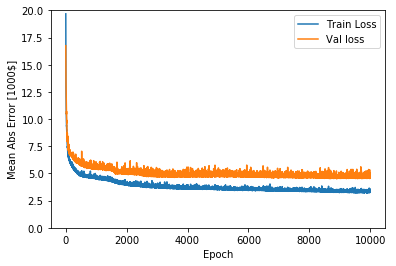

In [33]:
learning_rate = 0.0003
epochs = 10000


model = build_model(learning_rate=learning_rate)
history = model.fit(training_data_features, training_data_labels, epochs=epochs,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])        
print('Learning Rate ', learning_rate)
print(model.evaluate(test_data_features, test_data_labels, verbose=0))
print(plot_history(history))
    
predicted_value = model.predict(test_data_features)
MSE = mean_squared_error(np.asmatrix(test_data_labels), predicted_value)
print("Mean Square Error ", MSE)
for i in range(0,5):
    print(predicted_value[i], "--", np.asmatrix(test_data_labels)[i])